In [54]:
import os
import sys
sys.path.append("./../")
import numpy as np
import matplotlib.pyplot as plt
import pdb
import pandas as pd
import yaml
import h5py
import vicon_imu_data_process.process_landing_data as pro_rd
import estimation_assessment.scores as es_as

import seaborn as sns
import copy
import re
import json

from vicon_imu_data_process.const import FEATURES_FIELDS, LABELS_FIELDS, DATA_PATH
from vicon_imu_data_process.const import DROPLANDING_PERIOD, RESULTS_PATH
from vicon_imu_data_process import const
from vicon_imu_data_process.dataset import *

from estimation_models.rnn_models import *
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
import time as localtimepkg

from estimation_study import *
from estimation_assessment.visualization import *
#import pdb
import re

In [2]:
# Plot metrics
def p6plot_model_accuracy(combination_investigation_metrics,filters={}, ttest=False, save_fig=False, save_format='.svg', save_folder_index=0, title='model comparison', **kwargs):

    # load metrics
    metrics = parase_list_investigation_metrics(combination_investigation_metrics,**filters)
    
    if('replace_columns' in kwargs.keys()):
        replace_columns = kwargs['replace_columns']
    else:
        replace_columns={}
    metrics.rename(columns = replace_columns, inplace = True)
    
    if('replace_map' in kwargs.keys()):
        replace_map = kwargs['replace_map']
    else:
        replace_map={}
    metrics.replace(replace_map, inplace=True)

    # plot config
    if('hue' in kwargs.keys()):
        hue = kwargs['hue']
    else:
        hue = None

    if('x' in kwargs.keys()):
        x = kwargs['x']
    else:
        x='alias_name'
        
    if('plot_title' in kwargs.keys()):
        plot_title = kwargs['plot_title']
    else:
        plot_title=''

    y = 'r2'
    #displayed_data = metrics.loc[metrics['Sensor configurations'].isin(imu_config)]
    hue_plot_params = {
        'data': metrics,
        'x': x,
        'y': y,
        'hue':hue,
        #"showfliers": False,
        #"showmeans": True
    }
    g = sns.barplot(**hue_plot_params)
    g.set_xlabel(x)
    g.set_ylabel('$R^2$')
    g.set_title(plot_title)
    #g.set_ylim(0.4,1.0)
    g.set_yticks([0.6, 0.7, 0.8, 0.85, 0.9, 0.95, 1.0])
    #g.set_yticks([0.8, 0.85, 0.87, 0.9, 0.93, 0.95, 1.0])
    g.grid(visible=True, axis='both',which='major')

    if ttest:
        test_method="t-test_ind"
        pairs = (
        [('Baseline','IMU augmentation'),('IMU augmentation','Fine-tuning'),('Non-augmentation DANN','Augmentation DANN'), ('Baseline', 'Augmentation DANN')]
        )
        pairs = (
        [(' baseline_v7',' aug_dann_v8')]
        )
        annotator=Annotator(g, pairs=pairs,**hue_plot_params)
        annotator.configure(test=test_method, text_format='star', loc='inside')
        annotator.apply_and_annotate()


    fig=g.get_figure()
    fig.set_figwidth(26); fig.set_figheight(7)
    if(save_fig):
        results = save_figure(os.path.dirname(combination_investigation_metrics[save_folder_index]),fig_name=title,fig_format=save_format)
        print(results)
    else:
        results = 0

    return results

/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline/baseline_v2/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline/baseline_v3/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline/baseline_v4/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline/baseline_v5/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline/baseline_v6/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline/baseline_v7/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline/baseline_v8/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline/baseline_v9/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline/baseline_v10/metrics.csv
/home/sun/drop_landing_workspace/results/training_test

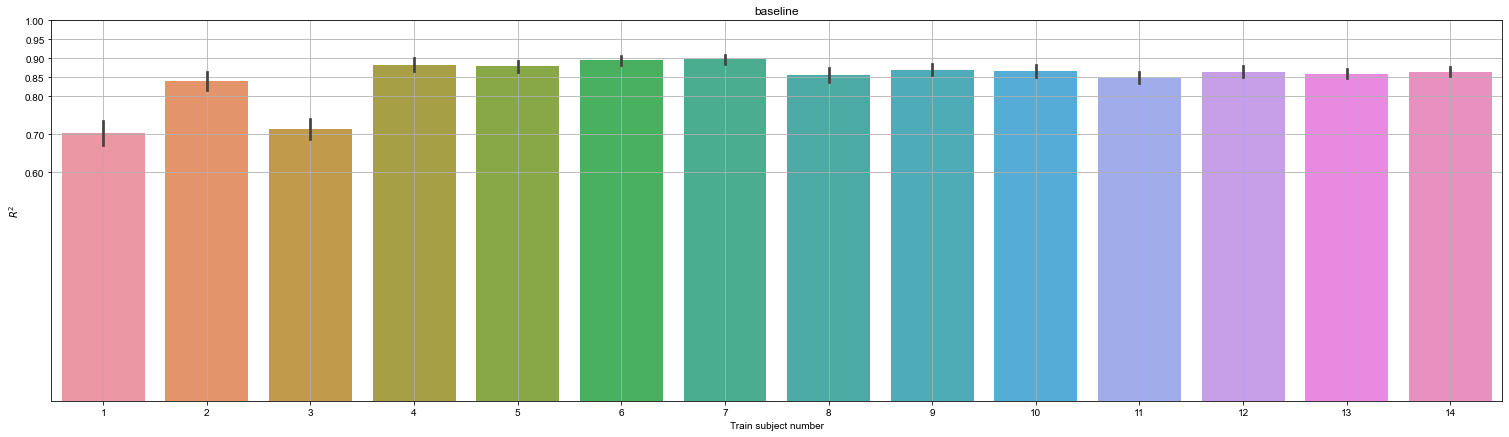

In [9]:
#=========================================================#

fliters={'drop_value':0.0,'sort_variable':'r2'}
combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","investigation_baseline","baseline_v"+str(idx),"testing_result_folders.txt") for idx in range(2,16)
                                    ]
#combination_investigation_results = [
#    os.path.join(RESULTS_PATH, "training_testing","investigation_repeated_dann","repeated_dann_v"+str(idx),"testing_result_folders.txt") for idx in range(2,16)
#                                    ]

#metrics = get_list_investigation_metrics(combination_investigation_results)
combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]
metrics = get_list_investigation_metrics(combination_investigation_metrics)
subs = list(set(metrics['alias_name']))
replace_map = {sub: int(sub.split('v')[1])-1 for sub in subs}

print(replace_map)

plot_config={
        "save_fig": False, "save_format":"jpg", "save_folder_index": 0,
         "hue": None,
        'replace_map': replace_map,
        'replace_columns': {'alias_name': 'Train subject number'},
        'x': 'Train subject number',
        'title': 'baseline',
        'plot_title': 'baseline'
    }

p6plot_model_accuracy(combination_investigation_metrics,fliters, ttest=False, **plot_config)

print('Plot sucessulflY')

/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment/imu_augmnet_v6/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline/baseline_v6/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_repeated_dann/repeated_dann_v6/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_aug_dann/augment_dann_v6/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment/imu_augmnet_v6/metrics.csv
{' baseline_v6': 5, ' augment_dann_v6': 5, ' imu_augment_v6': 5, ' repeated_dann_v6': 5}
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline/baseline_v6/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_repeated_dann/repeated_dann_v6/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/investigation_aug

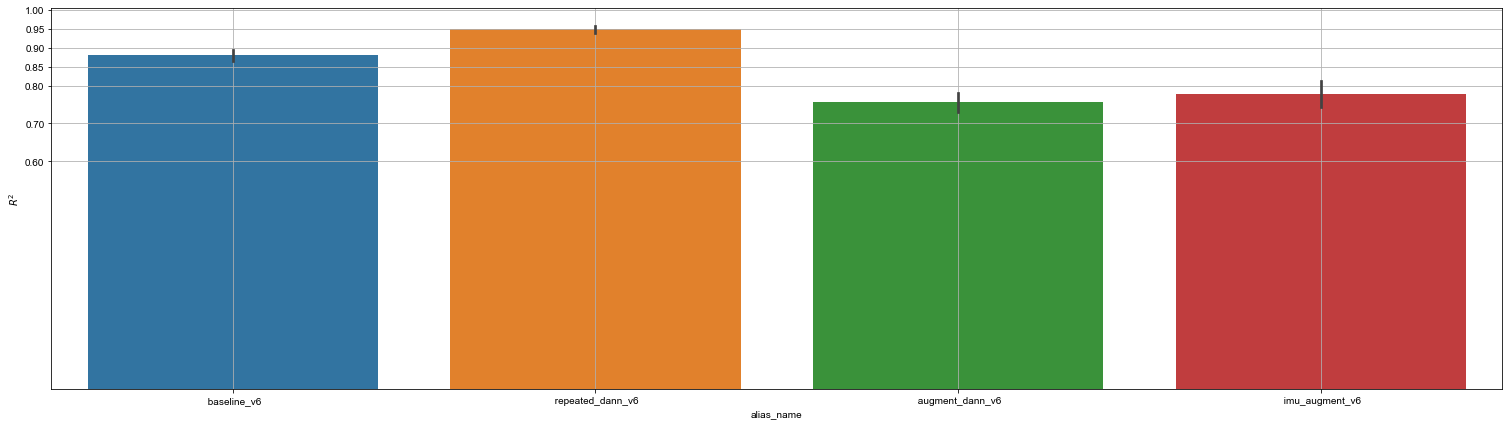

In [19]:
fliters={'drop_value':0.0,'sort_variable':'r2'}
combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","investigation_baseline","baseline_v"+str(6),"testing_result_folders.txt"),
    os.path.join(RESULTS_PATH, "training_testing","investigation_repeated_dann","repeated_dann_v"+str(6),"testing_result_folders.txt"),
    os.path.join(RESULTS_PATH, "training_testing","investigation_aug_dann","augment_dann_v"+str(6),"testing_result_folders.txt"),
    os.path.join(RESULTS_PATH, "training_testing","investigation_imu_augment","imu_augmnet_v"+str(6),"testing_result_folders.txt"),
                                    ]
#combination_investigation_results = [
#    os.path.join(RESULTS_PATH, "training_testing","investigation_repeated_dann","repeated_dann_v"+str(idx),"testing_result_folders.txt") for idx in range(2,16)
#                                    ]

metrics = get_list_investigation_metrics(combination_investigation_results[-1])
combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]
metrics = get_list_investigation_metrics(combination_investigation_metrics)
subs = list(set(metrics['alias_name']))
replace_map = {sub: int(sub.split('v')[1])-1 for sub in subs}
print(replace_map)

plot_config={
        "save_fig": False, "save_format":"jpg", "save_folder_index": 0,
         "hue": None,
        #'replace_map': replace_map,
        #'replace_columns': {'alias_name': 'Train subject number'},
        #'x': 'Train subject number',
        'title': 'baseline',
        #'plot_title': 'baseline'
    }

p6plot_model_accuracy(combination_investigation_metrics,fliters, ttest=False, **plot_config)

print('Plot sucessulflY')

/home/sun/drop_landing_workspace/results/training_testing/investigation_10trials_baseline/10trials_baseline_v2/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_10trials_baseline/10trials_baseline_v3/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_10trials_baseline/10trials_baseline_v4/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_10trials_baseline/10trials_baseline_v5/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_10trials_baseline/10trials_baseline_v6/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_10trials_baseline/10trials_baseline_v7/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_10trials_baseline/10trials_baseline_v8/testing_result_folders.txt
/home/sun/drop_landing_workspace/r

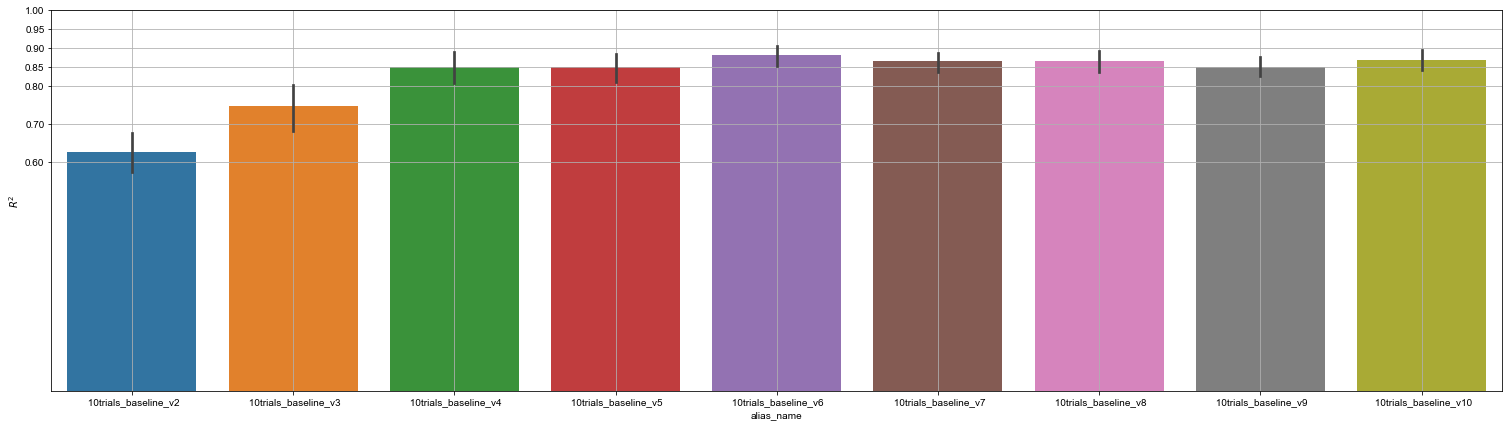

In [20]:
fliters={'drop_value':0.0,'sort_variable':'r2'}
combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","investigation_10trials_baseline","10trials_baseline_v"+str(idx),"testing_result_folders.txt") for idx in range(2,11)
                                    ]
#combination_investigation_results = [
#    os.path.join(RESULTS_PATH, "training_testing","investigation_repeated_dann","repeated_dann_v"+str(idx),"testing_result_folders.txt") for idx in range(2,16)
#                                    ]

metrics = get_list_investigation_metrics(combination_investigation_results)
combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]
metrics = get_list_investigation_metrics(combination_investigation_metrics)
subs = list(set(metrics['alias_name']))
replace_map = {sub: int(sub.split('v')[1])-1 for sub in subs}
print(replace_map)

plot_config={
        "save_fig": False, "save_format":"jpg", "save_folder_index": 0,
         "hue": None,
        #'replace_map': replace_map,
        #'replace_columns': {'alias_name': 'Train subject number'},
        #'x': 'Train subject number',
        'title': 'baseline',
        #'plot_title': 'baseline'
    }

p6plot_model_accuracy(combination_investigation_metrics,fliters, ttest=False, **plot_config)

print('Plot sucessulflY')

/home/sun/drop_landing_workspace/results/training_testing/investigation_10trials_repeated_dann/10trials_repeated_dann_v2/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_10trials_repeated_dann/10trials_repeated_dann_v3/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_10trials_repeated_dann/10trials_repeated_dann_v4/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_10trials_repeated_dann/10trials_repeated_dann_v5/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_10trials_repeated_dann/10trials_repeated_dann_v6/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_10trials_repeated_dann/10trials_repeated_dann_v2/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_10trials_repeated_dann/10trials_repeated_dann_v3/metric

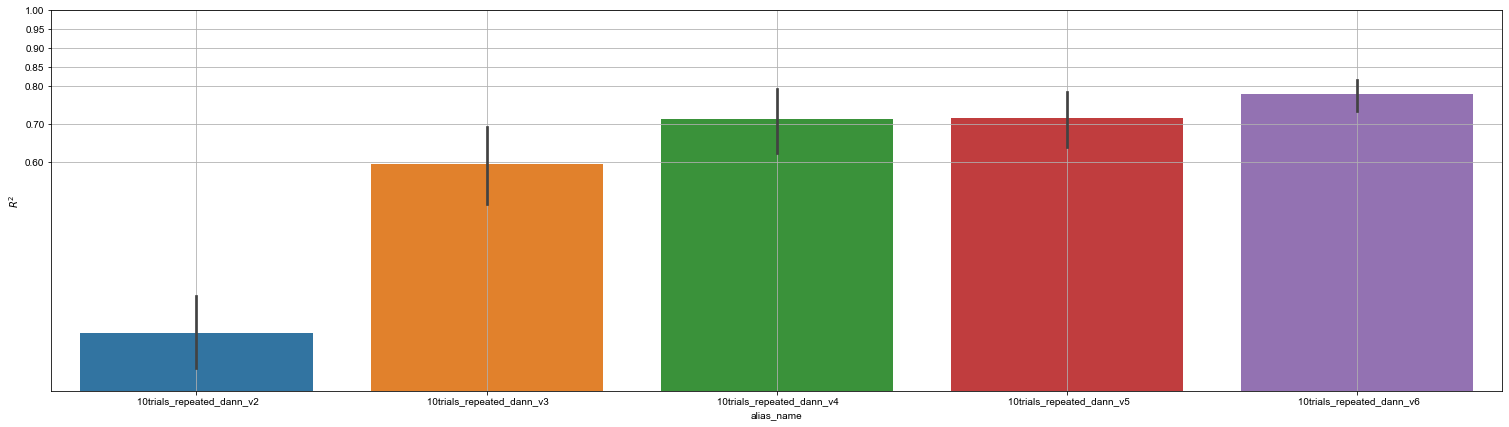

In [29]:
fliters={'drop_value':0.0,'sort_variable':'r2'}
combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","investigation_10trials_repeated_dann","10trials_repeated_dann_v"+str(idx),"testing_result_folders.txt") for idx in range(2,7)
                                    ]
metrics = get_list_investigation_metrics(combination_investigation_results)
combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]
metrics = get_list_investigation_metrics(combination_investigation_metrics)
subs = list(set(metrics['alias_name']))
replace_map = {sub: int(sub.split('v')[1])-1 for sub in subs}
print(replace_map)

plot_config={
        "save_fig": False, "save_format":"jpg", "save_folder_index": 0,
         "hue": None,
        #'replace_map': replace_map,
        #'replace_columns': {'alias_name': 'Train subject number'},
        #'x': 'Train subject number',
        'title': 'baseline',
        #'plot_title': 'baseline'
    }

p6plot_model_accuracy(combination_investigation_metrics,fliters, ttest=False, **plot_config)

print('Plot sucessulflY')

/home/sun/drop_landing_workspace/results/training_testing/model_comparison/baseline_v4/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/model_comparison/aug_dann_v9/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/model_comparison/normal_dann_v2/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/model_comparison/baseline_v4/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/model_comparison/aug_dann_v9/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/model_comparison/normal_dann_v2/metrics.csv
{' aug_dann_v9': 8, ' normal_dann_v2': 1, ' baseline_v4': 3}
/home/sun/drop_landing_workspace/results/training_testing/model_comparison/baseline_v4/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/training_testing/model_comparison/aug_dann_v9/metrics.csv
DROP R2 cases below :0.0
/home/sun/drop_landing_workspace/results/train

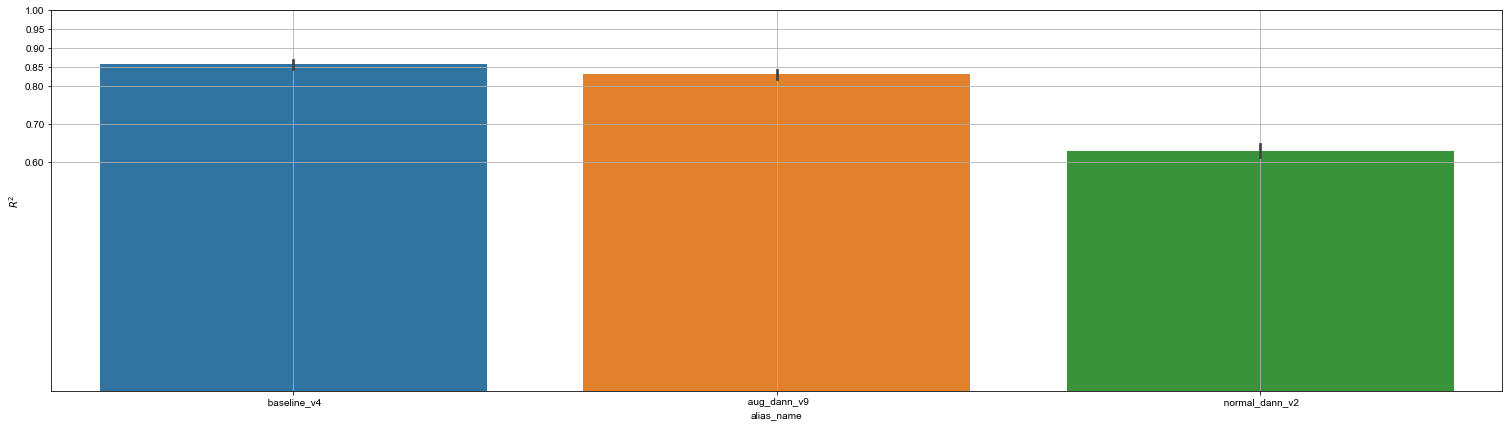

In [28]:
fliters={'drop_value':0.0,'sort_variable':'r2'}
combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","model_comparison","baseline_v4","testing_result_folders.txt"),
    os.path.join(RESULTS_PATH, "training_testing","model_comparison","aug_dann_v9","testing_result_folders.txt"),
    os.path.join(RESULTS_PATH, "training_testing","model_comparison","normal_dann_v2","testing_result_folders.txt"),
                                    ]

metrics = get_list_investigation_metrics(combination_investigation_results)
combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]
metrics = get_list_investigation_metrics(combination_investigation_metrics)
subs = list(set(metrics['alias_name']))
replace_map = {sub: int(sub.split('v')[1])-1 for sub in subs}
print(replace_map)

plot_config={
        "save_fig": False, "save_format":"jpg", "save_folder_index": 0,
         "hue": None,
        #'replace_map': replace_map,
        #'replace_columns': {'alias_name': 'Train subject number'},
        #'x': 'Train subject number',
        'title': 'baseline',
        #'plot_title': 'baseline'
    }

p6plot_model_accuracy(combination_investigation_metrics,fliters, ttest=False, **plot_config)

print('Plot sucessulflY')

/home/sun/drop_landing_workspace/results/training_testing/walking_model/pretrained_v1/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/walking_model/pretrained_v1/metrics.csv
{' pretrained_v1': 0}
/home/sun/drop_landing_workspace/results/training_testing/walking_model/pretrained_v1/metrics.csv
DROP R2 cases below :0.0
Plot sucessulflY


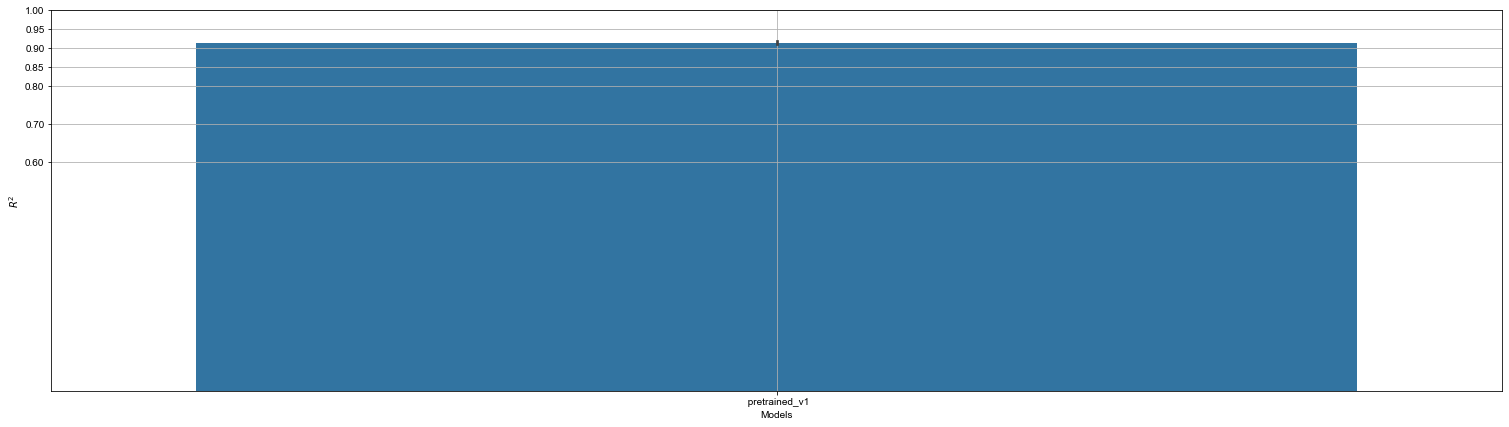

In [5]:
fliters={'drop_value':0.0,'sort_variable':'r2'}
combination_investigation_results = [
    #os.path.join(RESULTS_PATH, "training_testing","investigation_10trials_normal_dann","10trials_normal_dann_v6","testing_result_folders.txt"),
    os.path.join(RESULTS_PATH, "training_testing","walking_model","pretrained_v1","testing_result_folders.txt"),
                                    ]

metrics = get_list_investigation_metrics(combination_investigation_results)
combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]
metrics = get_list_investigation_metrics(combination_investigation_metrics)
subs = list(set(metrics['alias_name']))
replace_map = {sub: int(sub.split('v')[1])-1 for sub in subs}
print(replace_map)

plot_config={
        "save_fig": False, "save_format":"jpg", "save_folder_index": 0,
         "hue": None,
        #'replace_map': replace_map,
        #'replace_columns': {'alias_name': 'Train subject number'},
        #'x': 'Train subject number',
        'title': 'baseline',
        #'plot_title': 'baseline'
    }

p6plot_model_accuracy(combination_investigation_metrics,fliters, ttest=False, **plot_config)

print('Plot sucessulflY')

/home/sun/drop_landing_workspace/results/training_testing/investigation_10trials_imu_augmnet/10trials_imu_augment_v10/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/walking_model/pretrained_v2/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_10trials_imu_augmnet/10trials_imu_augment_v2/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_10trials_imu_augmnet/10trials_imu_augment_v3/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_10trials_imu_augmnet/10trials_imu_augment_v4/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_10trials_imu_augmnet/10trials_imu_augment_v5/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_10trials_imu_augmnet/10trials_imu_augment_v6/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_10trials_imu_augmnet/10trials_imu_augmen

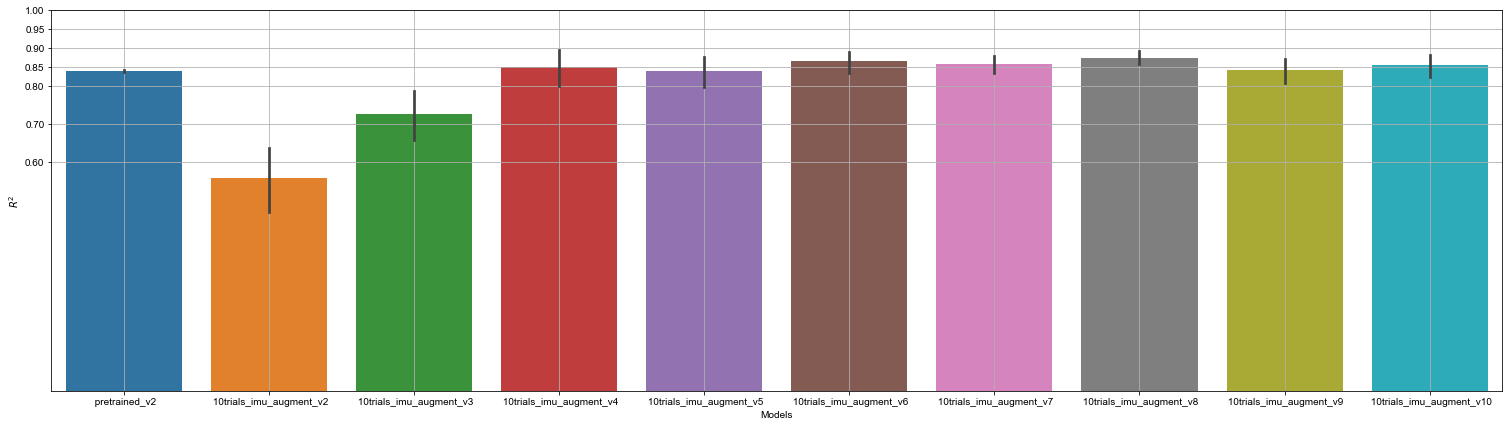

In [2]:
fliters={'drop_value':0.0,'sort_variable':'r2'}
combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","walking_model","pretrained_v2","testing_result_folders.txt")
]+[
    os.path.join(RESULTS_PATH, "training_testing","investigation_10trials_imu_augmnet","10trials_imu_augment_v"+str(idx),"testing_result_folders.txt") for idx in range(2,11)
                                    ]

metrics = get_list_investigation_metrics(combination_investigation_results[-1])
combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]
metrics = get_list_investigation_metrics(combination_investigation_metrics)
subs = list(set(metrics['alias_name']))
replace_map = {sub: int(sub.split('v')[1])-1 for sub in subs}
print(replace_map)

plot_config={
        "save_fig": False, "save_format":"jpg", "save_folder_index": 0,
         "hue": None,
        #'replace_map': replace_map,
        #'replace_columns': {'alias_name': 'Train subject number'},
        #'x': 'Train subject number',
        'title': 'baseline',
        #'plot_title': 'baseline'
    }

p6plot_model_accuracy(combination_investigation_metrics,fliters, ttest=False, **plot_config)

print('Plot sucessulflY')

## 5 trials baseline

/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_baseline/5trials_baseline_v2/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_baseline/5trials_baseline_v3/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_baseline/5trials_baseline_v4/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_baseline/5trials_baseline_v5/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_baseline/5trials_baseline_v6/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_baseline/5trials_baseline_v7/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_baseline/5trials_baseline_v8/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/trainin

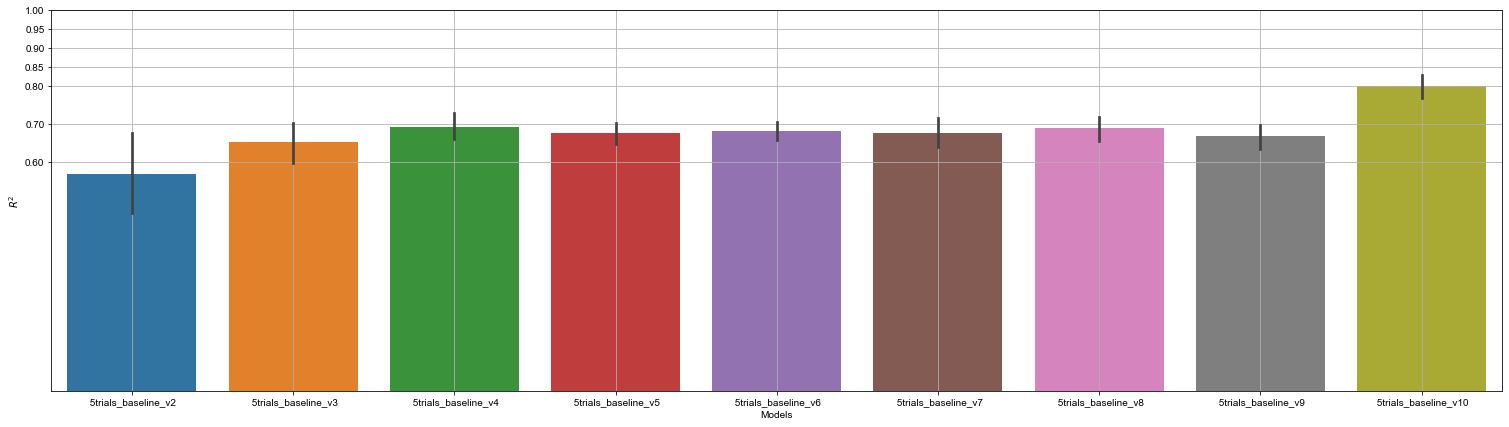

In [7]:
fliters={'drop_value':0.0,'sort_variable':'r2'}
combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","investigation_5trials_baseline","5trials_baseline_v"+str(idx),"testing_result_folders.txt") for idx in range(2,11)
                                    ]

metrics = get_list_investigation_metrics(combination_investigation_results)
combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]
metrics = get_list_investigation_metrics(combination_investigation_metrics)
subs = list(set(metrics['alias_name']))
replace_map = {sub: int(sub.split('v')[1])-1 for sub in subs}
print(replace_map)

plot_config={
        "save_fig": False, "save_format":"jpg", "save_folder_index": 0,
         "hue": None,
        #'replace_map': replace_map,
        #'replace_columns': {'alias_name': 'Train subject number'},
        #'x': 'Train subject number',
        'title': 'baseline',
        #'plot_title': 'baseline'
    }

p6plot_model_accuracy(combination_investigation_metrics,fliters, ttest=False, **plot_config)

print('Plot sucessulflY')

/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_imu_augment/5trials_imu_augment_v2/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_imu_augment/5trials_imu_augment_v3/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_imu_augment/5trials_imu_augment_v4/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_imu_augment/5trials_imu_augment_v5/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_imu_augment/5trials_imu_augment_v6/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_imu_augment/5trials_imu_augment_v7/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_imu_augment/5trials_imu_augment_v8/testing_result_folders.txt
/home/

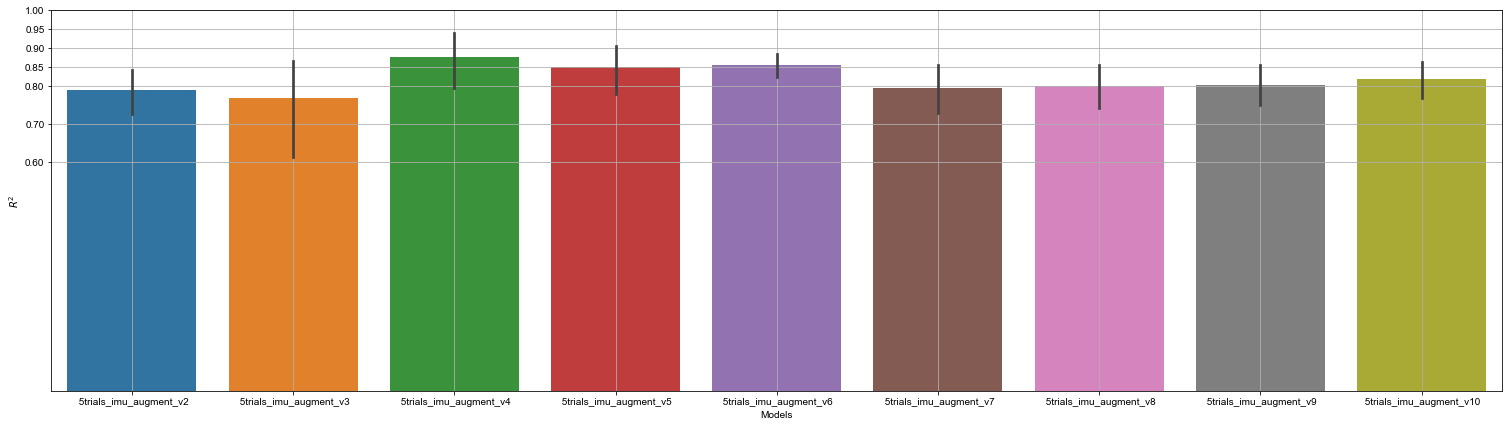

In [9]:
fliters={'drop_value':0.0,'sort_variable':'r2'}
combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","investigation_5trials_imu_augment","5trials_imu_augment_v"+str(idx),"testing_result_folders.txt") for idx in range(2,11)
                                    ]

metrics = get_list_investigation_metrics(combination_investigation_results)
combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]
metrics = get_list_investigation_metrics(combination_investigation_metrics)
subs = list(set(metrics['alias_name']))
replace_map = {sub: int(sub.split('v')[1])-1 for sub in subs}
print(replace_map)

plot_config={
        "save_fig": False, "save_format":"jpg", "save_folder_index": 0,
         "hue": None,
        #'replace_map': replace_map,
        #'replace_columns': {'alias_name': 'Train subject number'},
        #'x': 'Train subject number',
        'title': 'baseline',
        #'plot_title': 'baseline'
    }

p6plot_model_accuracy(combination_investigation_metrics,fliters, ttest=False, **plot_config)

print('Plot sucessulflY')

In [10]:
metrics.head()

,Unnamed: 0,model_selection,alias_name,labels_name,r2,r_rmse,test_subject,parent_test_id,child_test_id,Test ID,Metrics ID,subjects,trials,execution_time,additional_imus
0,0,imu_augment,5trials_imu_augment_v2,R_KNEE_MOMENT_X,-1.093,0.388,P_19_xiongyihui,test_153640,test_2,test_153640,test_153640_2,P_19_xiongyihui,0,-100,NaN
1,1,imu_augment,5trials_imu_augment_v2,R_KNEE_MOMENT_X,-0.679,0.335,P_19_xiongyihui,test_153640,test_4,test_153640,test_153640_4,P_19_xiongyihui,0,-100,NaN
2,2,imu_augment,5trials_imu_augment_v2,R_KNEE_MOMENT_X,-0.772,0.387,P_19_xiongyihui,test_153640,test_1,test_153640,test_153640_1,P_19_xiongyihui,0,-100,NaN
3,3,imu_augment,5trials_imu_augment_v2,R_KNEE_MOMENT_X,-0.373,0.296,P_19_xiongyihui,test_153640,test_3,test_153640,test_153640_3,P_19_xiongyihui,0,-100,NaN
4,4,imu_augment,5trials_imu_augment_v2,R_KNEE_MOMENT_X,-1.187,0.366,P_19_xiongyihui,test_153640,test_5,test_153640,test_153640_5,P_19_xiongyihui,0,-100,NaN


/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_finetuning/5trials_finetuning_v2/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_finetuning/5trials_finetuning_v3/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_finetuning/5trials_finetuning_v4/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_finetuning/5trials_finetuning_v5/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_finetuning/5trials_finetuning_v6/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_finetuning/5trials_finetuning_v7/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_finetuning/5trials_finetuning_v8/testing_result_folders.txt
/home/sun/drop_landi

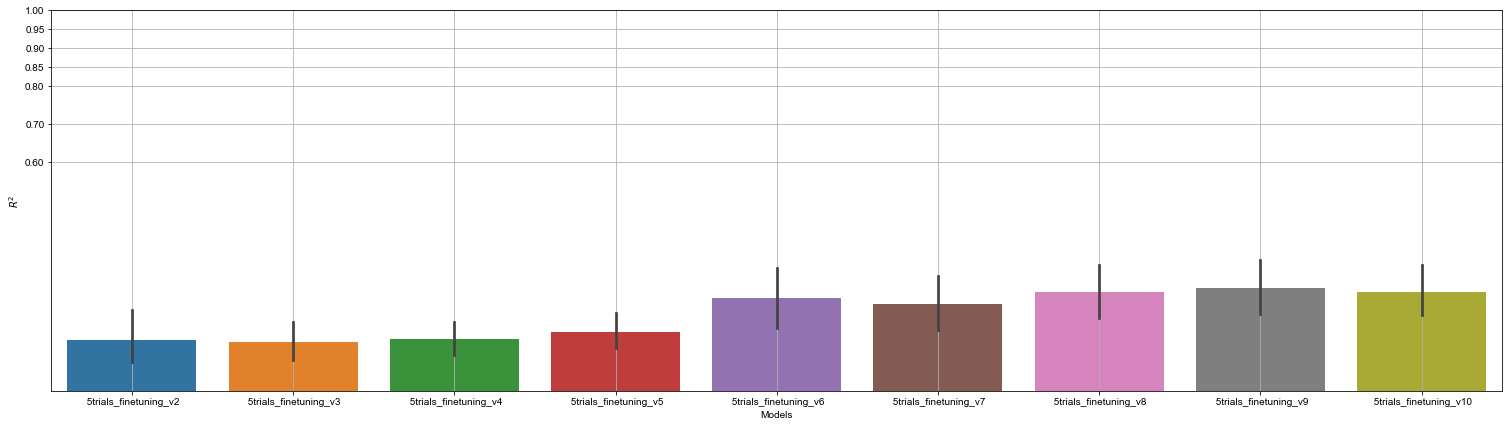

In [4]:
# 5 trials fine-tuning
fliters={'drop_value':0.0,'sort_variable':'r2'}
combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","investigation_5trials_finetuning","5trials_finetuning_v"+str(idx),"testing_result_folders.txt") for idx in range(2,11)
                                    ]

metrics = get_list_investigation_metrics(combination_investigation_results)
combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]
metrics = get_list_investigation_metrics(combination_investigation_metrics)
subs = list(set(metrics['alias_name']))
replace_map = {sub: int(sub.split('v')[1])-1 for sub in subs}
print(replace_map)

plot_config={
        "save_fig": False, "save_format":"jpg", "save_folder_index": 0,
         "hue": None,
        #'replace_map': replace_map,
        #'replace_columns': {'alias_name': 'Train subject number'},
        #'x': 'Train subject number',
        'title': 'baseline',
        #'plot_title': 'baseline'
    }

p6plot_model_accuracy(combination_investigation_metrics,fliters, ttest=False, **plot_config)

print('Plot sucessulflY')

/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_repeated_dann/5trials_repeated_dann_v2/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_repeated_dann/5trials_repeated_dann_v3/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_repeated_dann/5trials_repeated_dann_v4/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_repeated_dann/5trials_repeated_dann_v5/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_repeated_dann/5trials_repeated_dann_v6/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_repeated_dann/5trials_repeated_dann_v7/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_repeated_dann/5trials_repeated_dann_v8/testi

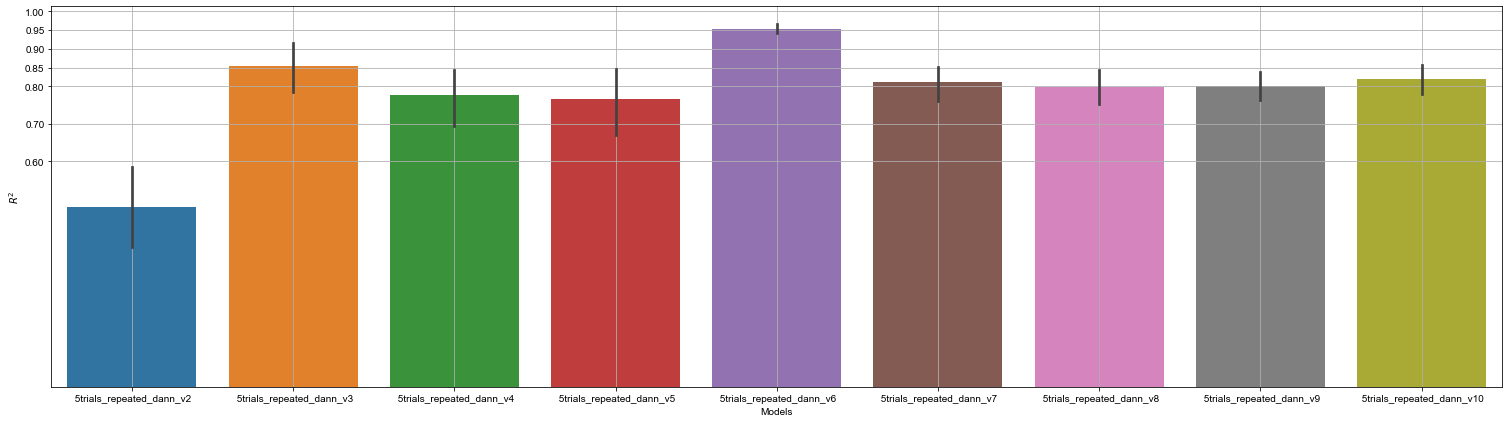

In [2]:

# 5 trials fine-tuning
fliters={'drop_value':0.0,'sort_variable':'r2'}
combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","investigation_5trials_repeated_dann","5trials_repeated_dann_v"+str(idx),"testing_result_folders.txt") for idx in range(2,11)
                                    ]

metrics = get_list_investigation_metrics(combination_investigation_results)
combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]
metrics = get_list_investigation_metrics(combination_investigation_metrics)
subs = list(set(metrics['alias_name']))
replace_map = {sub: int(sub.split('v')[1])-1 for sub in subs}
print(replace_map)

plot_config={
        "save_fig": False, "save_format":"jpg", "save_folder_index": 0,
         "hue": None,
        #'replace_map': replace_map,
        #'replace_columns': {'alias_name': 'Train subject number'},
        #'x': 'Train subject number',
        'title': 'baseline',
        #'plot_title': 'baseline'
    }

p6plot_model_accuracy(combination_investigation_metrics,fliters, ttest=False, **plot_config)

print('Plot sucessulflY')

/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_augment_dann/5trials_augment_dann_v2/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_augment_dann/5trials_augment_dann_v3/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_augment_dann/5trials_augment_dann_v4/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_augment_dann/5trials_augment_dann_v5/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_augment_dann/5trials_augment_dann_v6/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_augment_dann/5trials_augment_dann_v7/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_augment_dann/5trials_augment_dann_v8/testing_result_fold

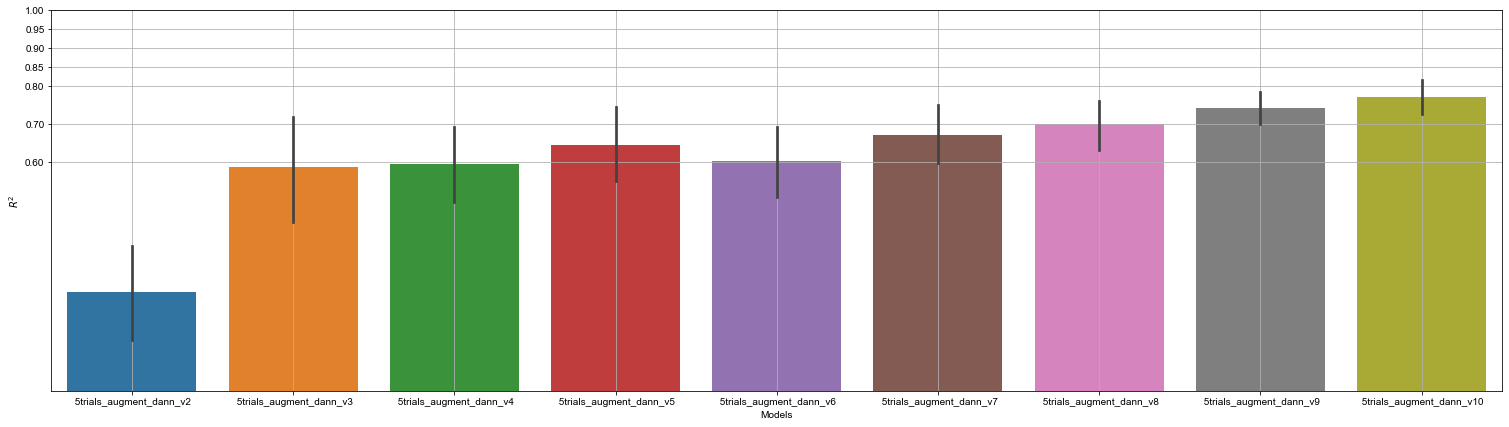

In [5]:


# 5 trials fine-tuning
fliters={'drop_value':0.0,'sort_variable':'r2'}
combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","investigation_5trials_augment_dann","5trials_augment_dann_v"+str(idx),"testing_result_folders.txt") for idx in range(2,11)
                                    ]

metrics = get_list_investigation_metrics(combination_investigation_results)
combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]
metrics = get_list_investigation_metrics(combination_investigation_metrics)
subs = list(set(metrics['alias_name']))
replace_map = {sub: int(sub.split('v')[1])-1 for sub in subs}
print(replace_map)

plot_config={
        "save_fig": False, "save_format":"jpg", "save_folder_index": 0,
         "hue": None,
        #'replace_map': replace_map,
        #'replace_columns': {'alias_name': 'Train subject number'},
        #'x': 'Train subject number',
        'title': 'baseline',
        #'plot_title': 'baseline'
    }

p6plot_model_accuracy(combination_investigation_metrics,fliters, ttest=False, **plot_config)

print('Plot sucessulflY')

/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_normal_dann/5trials_normal_dann_v2/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_normal_dann/5trials_normal_dann_v3/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_normal_dann/5trials_normal_dann_v4/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_normal_dann/5trials_normal_dann_v5/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_normal_dann/5trials_normal_dann_v6/testing_result_folders.txt
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_normal_dann/5trials_normal_dann_v2/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_5trials_normal_dann/5trials_normal_dann_v3/metrics.csv
/home/sun/drop_landing_workspace/res

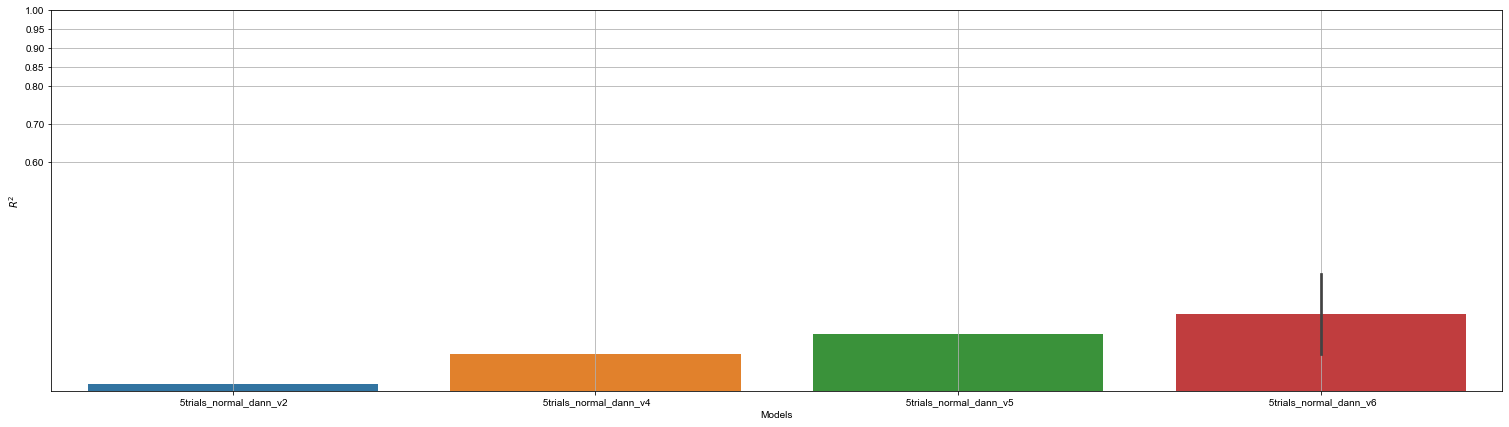

In [7]:
# 5 trials fine-tuning
fliters={'drop_value':0.0,'sort_variable':'r2'}
combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","investigation_5trials_normal_dann","5trials_normal_dann_v"+str(idx),"testing_result_folders.txt") for idx in range(2,7)
                                    ]

metrics = get_list_investigation_metrics(combination_investigation_results)
combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]
metrics = get_list_investigation_metrics(combination_investigation_metrics)
subs = list(set(metrics['alias_name']))
replace_map = {sub: int(sub.split('v')[1])-1 for sub in subs}
print(replace_map)

plot_config={
        "save_fig": False, "save_format":"jpg", "save_folder_index": 0,
         "hue": None,
        #'replace_map': replace_map,
        #'replace_columns': {'alias_name': 'Train subject number'},
        #'x': 'Train subject number',
        'title': 'baseline',
        #'plot_title': 'baseline'
    }

p6plot_model_accuracy(combination_investigation_metrics,fliters, ttest=False, **plot_config)

print('Plot sucessulflY')

In [8]:
metrics.head()

,Unnamed: 0,model_selection,alias_name,labels_name,r2,r_rmse,test_subject,parent_test_id,child_test_id,Test ID,Metrics ID,subjects,trials,execution_time,additional_imus
0,0,Normal_DANN,5trials_normal_dann_v2,R_KNEE_MOMENT_X,-1.632,0.401,P_19_xiongyihui,test_134034,test_2,test_134034,test_134034_2,P_19_xiongyihui,0,-100,NaN
1,1,Normal_DANN,5trials_normal_dann_v2,R_KNEE_MOMENT_X,-0.788,0.345,P_19_xiongyihui,test_134034,test_4,test_134034,test_134034_4,P_19_xiongyihui,0,-100,NaN
2,2,Normal_DANN,5trials_normal_dann_v2,R_KNEE_MOMENT_X,-1.078,0.387,P_19_xiongyihui,test_134034,test_1,test_134034,test_134034_1,P_19_xiongyihui,0,-100,NaN
3,3,Normal_DANN,5trials_normal_dann_v2,R_KNEE_MOMENT_X,0.017,0.250,P_19_xiongyihui,test_134034,test_3,test_134034,test_134034_3,P_19_xiongyihui,0,-100,NaN
4,4,Normal_DANN,5trials_normal_dann_v2,R_KNEE_MOMENT_X,-0.658,0.374,P_19_xiongyihui,test_134034,test_5,test_134034,test_134034_5,P_19_xiongyihui,0,-100,NaN


In [1]:
# List metrics 
#metrics= metrics.round(2)
metrics[['r2','alias name']].groupby('Model name').describe().round(2)

NameError: name 'metrics' is not defined

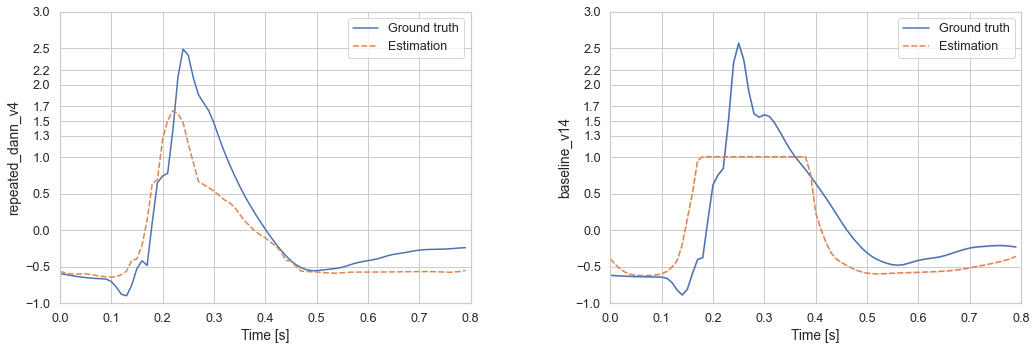

In [18]:
# Plot estimation results
selection=len(combination_investigation_results)*[{'child_test_id':['test_26'], 'test_subject': ['P_23_wangjinhong']}]
#selection=len(combination_investigation_results)*[{ 'test_subject': ['P_23_wangjinhong']}]
figpath, multi_model_results = p6plot_statistic_actual_estimation_curves(combination_investigation_results,selection, col_wrap=2,figsize=(15,5))

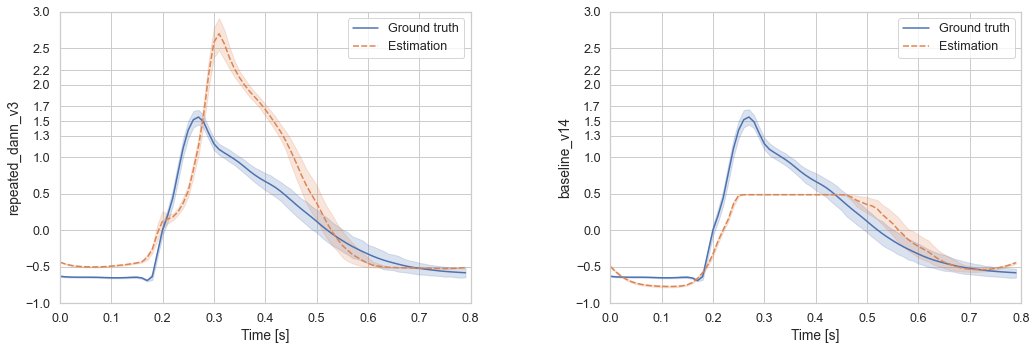

In [9]:

# Plot estimation results
selection=len(combination_investigation_results)*[{'child_test_id':['test_2'], 'test_subject': ['P_23_wangjinhong']}]
selection=len(combination_investigation_results)*[{ 'test_subject': ['P_14_hunan']}]
figpath, multi_model_results = p6plot_statistic_actual_estimation_curves(combination_investigation_results,selection, col_wrap=2,figsize=(15,5))

In [11]:
# plot curves

selection={'parent_test_id': ['test_114836'],'child_test_id':['test_10']}
#selection={}
test_results = get_multi_models_test_results([combination_investigation_results[-]], **selection)
sns.lineplot(data=test_results[0])
plt.show()
es_as.calculate_scores(test_results[0]['Actual R_KNEE_MOMENT_X'],test_results[0]['Estimated R_KNEE_MOMENT_X'])

SyntaxError: invalid syntax (<ipython-input-11-5af4d1c84b28>, line 5)

In [ ]:
selection={'parent_test_id': ['test_161724'], 'child_test_id': ['test_1']}
test_results = get_multi_models_test_results([combination_investigation_results[1]], **selection)
sns.lineplot(data=test_results[0])
plt.show()
es_as.calculate_scores(test_results[0]['Actual R_KNEE_MOMENT_X'],test_results[0]['Estimated R_KNEE_MOMENT_X'])

In [ ]:
test_results[0].index

In [ ]:

plot_statistic_actual_estimation_curves(a_testing_training_folder,selection)

In [ ]:
sns.lineplot(data=test_results[0])

In [96]:
# calculate landing trials and walking steps

datafile_path = os.path.join('/home/sun/drop_landing_workspace/data','repeated_kam_norm_landing_data.hdf5')

subjects_trials_dataset = pro_rd.load_subjects_dataset(h5_file_name = datafile_path)

subjects_trials_len = {subject_id_name: len(list(trials.keys())) for subject_id_name, trials in subjects_trials_dataset.items()}
print(subjects_trials_len)
sum_len=0
for key, value in subjects_trials_len.items():
    sum_len+=value
    
print(sum_len)

{'P_08_zhangboyuan': 930, 'P_10_dongxuan': 899, 'P_11_liuchunyu': 868, 'P_13_xulibang': 930, 'P_14_hunan': 775, 'P_15_liuzhaoyu': 930, 'P_16_zhangjinduo': 682, 'P_17_congyuanqi': 930, 'P_18_hezhonghai': 930, 'P_19_xiongyihui': 837, 'P_20_xuanweicheng': 930, 'P_21_wujianing': 930, 'P_22_zhangning': 930, 'P_23_wangjinhong': 930, 'P_24_liziqing': 930}
13361


In [1]:
# display a training dataset

datafile_path = os.path.join(DATA_PATH,'5trials_6subjects_kam_norm_landing_data.hdf5')
subjects_trials_dataset = pro_rd.load_subjects_dataset(h5_file_name = datafile_path)

NameError: name 'os' is not defined

In [24]:
subjects_trials_dataset['P_19_xiongyihui']['02_2'].head()

,CHEST_Accel_X,CHEST_Accel_Y,CHEST_Accel_Z,CHEST_Gyro_X,CHEST_Gyro_Y,CHEST_Gyro_Z,WAIST_Accel_X,WAIST_Accel_Y,WAIST_Accel_Z,WAIST_Gyro_X,...,L_SHANK_Gyro_Y,L_SHANK_Gyro_Z,L_FOOT_Accel_X,L_FOOT_Accel_Y,L_FOOT_Accel_Z,L_FOOT_Gyro_X,L_FOOT_Gyro_Y,L_FOOT_Gyro_Z,TIME,R_KNEE_MOMENT_X
0,0.873680,-1.054720,1.147823,-0.177177,-1.000702,-0.568641,-0.082248,-0.847362,1.344848,-0.462917,...,-0.375061,2.426862,-0.297866,-2.450894,-0.499698,-1.217202,-1.500985,0.448566,-1.710534,-0.585363
1,0.745505,-1.125265,1.116270,-0.237917,-0.898672,-0.658596,-0.233152,-0.848288,1.451209,-0.507902,...,-0.337725,2.481624,-0.309693,-1.277195,-0.811247,-0.833689,-1.780025,0.496821,-1.667229,-0.620277
2,0.605257,-1.172369,1.089631,-0.306848,-0.810983,-0.696489,-0.288350,-0.864375,1.531622,-0.556638,...,-0.262027,2.457627,-0.319957,-0.217373,-1.064432,-0.424993,-2.022582,0.620883,-1.623924,-0.646019
3,0.483451,-1.196201,1.073872,-0.371164,-0.741103,-0.699799,-0.245871,-0.899992,1.567710,-0.589728,...,-0.207157,2.362875,-0.390880,0.666287,-1.242216,-0.048678,-2.202066,0.800929,-1.580620,-0.661961
4,0.405393,-1.200546,1.070888,-0.420837,-0.685905,-0.686846,-0.131863,-0.954941,1.545550,-0.590624,...,-0.231677,2.211664,-0.540695,1.345783,-1.345942,0.243136,-2.309681,0.996648,-1.537315,-0.672267


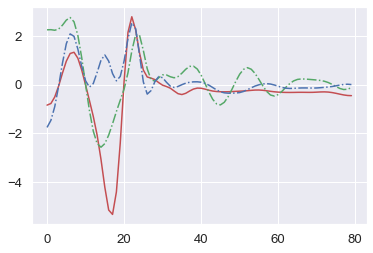

In [39]:
plt.plot(subjects_trials_dataset['P_19_xiongyihui']['02']['R_FOOT_Accel_X'],'r-')
plt.plot(subjects_trials_dataset['P_20_xuanweicheng']['03']['R_FOOT_Accel_X'],'g-.')
plt.plot(subjects_trials_dataset['P_16_zhangjinduo']['04']['R_FOOT_Accel_X'],'b-.')

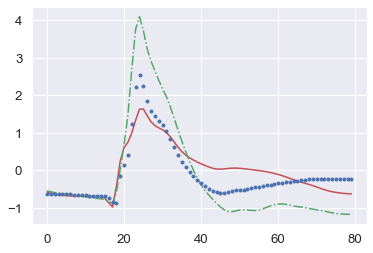

In [42]:
plt.plot(subjects_trials_dataset['P_19_xiongyihui']['02']['R_KNEE_MOMENT_X'],'r-')
plt.plot(subjects_trials_dataset['P_20_xuanweicheng']['03']['R_KNEE_MOMENT_X'],'g-.')
plt.plot(subjects_trials_dataset['P_16_zhangjinduo']['04']['R_KNEE_MOMENT_X'],'b.')

In [44]:
x={'a':1, 'b':2, 'c':3}

x[['a','b']]

TypeError: unhashable type: 'list'

In [86]:
# display landing dataset

datafile_path = os.path.join(DATA_PATH,'repeated_5trials_2subjects_kam_norm_landing_data.hdf5')
repeated_subjects_trials_dataset = pro_rd.load_subjects_dataset(h5_file_name = datafile_path)

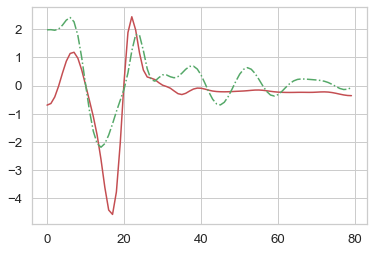

In [94]:
plt.plot(repeated_subjects_trials_dataset['P_19_xiongyihui']['02_1']['R_FOOT_Accel_X'],'r-')
plt.plot(repeated_subjects_trials_dataset['P_20_xuanweicheng']['03_1']['R_FOOT_Accel_X'],'g-.')
#plt.plot(repeated_subjects_trials_dataset['P_19_xiongyihui']['04_1']['R_FOOT_Accel_X'],'b.')

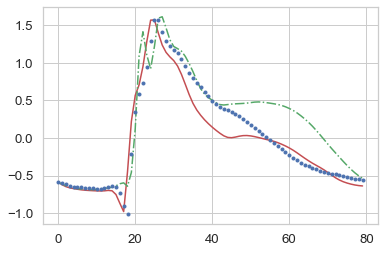

In [73]:
plt.plot(repeated_subjects_trials_dataset['P_19_xiongyihui']['02_0']['R_KNEE_MOMENT_X'],'r-')
plt.plot(repeated_subjects_trials_dataset['P_19_xiongyihui']['03_0']['R_KNEE_MOMENT_X'],'g-.')
plt.plot(repeated_subjects_trials_dataset['P_19_xiongyihui']['04_0']['R_KNEE_MOMENT_X'],'b.')

In [50]:
# walking data display

datafile_path = os.path.join(DATA_PATH,'kam_norm_walking_data.hdf5')
walking_subjects_trials_dataset = pro_rd.load_subjects_dataset(h5_file_name = datafile_path)

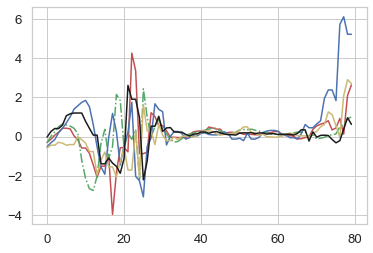

In [63]:
plt.plot(walking_subjects_trials_dataset['subject_01']['0']['R_FOOT_Accel_X'],'r-')
plt.plot(walking_subjects_trials_dataset['subject_01']['100']['R_FOOT_Accel_X'],'g-.')
plt.plot(walking_subjects_trials_dataset['subject_01']['200']['R_FOOT_Accel_X'],'b')
plt.plot(walking_subjects_trials_dataset['subject_01']['300']['R_FOOT_Accel_X'],'y')
plt.plot(walking_subjects_trials_dataset['subject_01']['400']['R_FOOT_Accel_X'],'k')

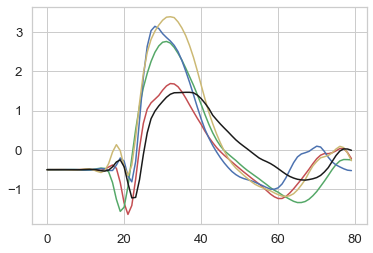

In [76]:
plt.plot(walking_subjects_trials_dataset['subject_01']['0']['R_KNEE_MOMENT_X'],'r')
plt.plot(walking_subjects_trials_dataset['subject_01']['100']['R_KNEE_MOMENT_X'],'g')
plt.plot(walking_subjects_trials_dataset['subject_01']['200']['R_KNEE_MOMENT_X'],'b')
plt.plot(walking_subjects_trials_dataset['subject_01']['300']['R_KNEE_MOMENT_X'],'y')
plt.plot(walking_subjects_trials_dataset['subject_01']['400']['R_KNEE_MOMENT_X'],'k')

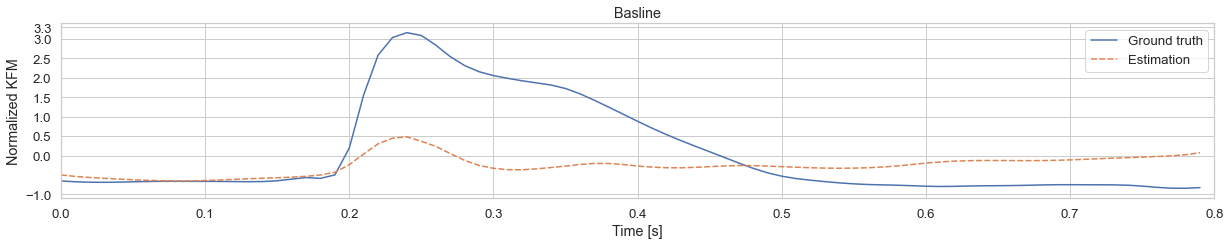

In [3]:
# Plot estimation results

combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","investigation_5trials_augment_dann_v2","5trials_augment_dann_v"+str(idx),"testing_result_folders.txt") for idx in range(2,3)
                                    ]
config = {
  'xticks':[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
  'yticks':[-1.0, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.3],
  'figsize': (18,3),
  'ylabels': 1*['Normalized KFM'],
   'titles': ['Basline', 'Fine-tuning', 'IMU augmentation', 'DANN', 'TDANN'],
  'font_scale':1.2,  
}
list_selection= [{'child_test_id': ['test_1'], 'parent_test_id': ['test_202149']}]
figpath, multi_model_results = p6plot_statistic_actual_estimation_curves(combination_investigation_results, list_selection, col_wrap=1, **config)

In [143]:

import torch
y = torch.Tensor([[1,2,3],[1,2,4]]).to('cuda').reshape(2,3)
x = torch.Tensor([[1,2,3],[1,2,3]]).to('cuda').reshape(2,3)

print(x-y)

print(x.dim)

tensor([[ 0.,  0.,  0.],
        [ 0.,  0., -1.]], device='cuda:0')
<built-in method dim of Tensor object at 0x7f12e4e8a340>


In [150]:
x.shape

torch.Size([2, 3])

In [173]:
x.unsqueeze(2).shape
y_true=torch.rand(40,80,1)
y_pred=torch.rand(40,80,1)
r2 = torch.mean(1-torch.sum((y_true-y_pred)**2,(1,2))/torch.sum((y_true-torch.mean(y_true,1).unsqueeze(2))**2,(1,2)))
print(r2)

tensor(-1.0921)


In [170]:
torch.sum((y_true-torch.mean(y_true,1).unsqueeze(2))**2,(1,2)).shape

torch.Size([40])

In [171]:
torch.sum((y_true-y_pred)**2,(1,2)).shape

torch.Size([40])

In [172]:
torch.sum((y_true-y_pred)**2,(1,2))/torch.sum((y_true-torch.mean(y_true,1).unsqueeze(2))**2,(1,2))

tensor([2.0247, 2.1652, 1.7599, 2.1192, 1.7949, 2.4409, 1.8471, 1.6049, 2.4020,
        1.8469, 2.3888, 2.0686, 1.9011, 1.3864, 2.2991, 1.8554, 1.9584, 2.4438,
        1.7331, 2.4394, 2.4107, 2.2875, 1.7367, 2.2068, 1.9416, 1.5678, 2.0823,
        2.4217, 1.9781, 1.9919, 2.2972, 1.9025, 1.5697, 2.0649, 1.7033, 2.6955,
        1.3521, 2.0320, 1.7976, 1.6376])

In [174]:
labels=y_true
predictions=y_pred


r2=[]
for idx in range(labels.shape[0]):
    a_label = labels[idx,:,:].cpu().numpy()
    a_prediction = predictions[idx,:,:].cpu().numpy()
    r2.append(es_as.calculate_scores(a_label, a_prediction)[0])
    mean_r2 =  sum(r2)/len(r2)


print(mean_r2)

-1.0921249999999998


In [121]:
from sklearn.metrics import r2_score
r2_score(x.cpu().numpy(),y.cpu().numpy())

0.6447368127802089

In [109]:
torch.mean(x)

tensor(2.6667, device='cuda:0')

{'baseline': 'Baseline', 'finetuning': 'Fine-tuning', 'imu_augment': 'IMU augmentation', 'Normal_DANN': 'DANN', 'DANN': 'TDANN', 'Aug_DANN': 'ADANN'}
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/5trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/10trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/15trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/20trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/25trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/5trials/6sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/10trials/6sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v

0

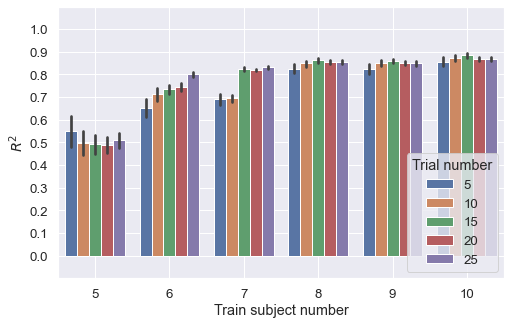

In [78]:
# display results of baseline

# baseline
combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","investigation_baseline_v1",str(trial_idx)+"trials",str(sub_idx)+"sub","testing_result_folders.txt") for sub_idx in range(5,11,1) for trial_idx in range(5,26,5)
                                    ]


#metrics = get_list_investigation_metrics(combination_investigation_results)
combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]
#metrics = get_list_investigation_metrics(combination_investigation_metrics)

#subs = list(set(metrics['alias_name']))
#replace_values = {sub: int(sub.split('v')[1])-1 for sub in subs}
replace_values = {}
replace_values.update({'baseline': 'Baseline', 'finetuning': 'Fine-tuning', 'imu_augment': 'IMU augmentation', 'Normal_DANN': 'DANN', 'DANN': 'TDANN', 'Aug_DANN': 'ADANN'})
print(replace_values)
replace_columns = {'subject_num': 'Train subject number', 'trial_num': 'Trial number'}

plot_config={
        "save_fig": False, "save_format":"jpg", "save_folder_index": 0,
         'figsize':(8, 5),
         "hue": 'Trial number',
        'replace_values': replace_values,
        'replace_columns': replace_columns,
        'x': 'Train subject number',
        'title': 'baseline',
        'yticks': (0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0),
        #'plot_title': 'baseline',
    'font_scale': 1.2,
    'plot_type': 'barplot',
    }

filters={'drop_value':0.0,'sort_variable':'r2'}
p6plot_model_accuracy(combination_investigation_metrics, ttest=False, **plot_config)

In [106]:

metrics.shape

/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/5trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/10trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/15trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/20trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/25trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/5trials/6sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/10trials/6sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/15trials/6sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/20trials/6sub/metrics.csv
/home/sun/dr

(22853, 17)

/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/5trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/10trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/15trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/20trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/25trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/5trials/6sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/10trials/6sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/15trials/6sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/20trials/6sub/metrics.csv
/home/sun/dr

Text(0.5, 10.5, 'Trial number')

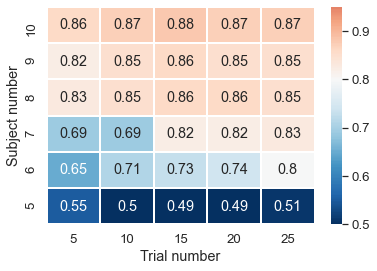

In [127]:
# baseline
combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","investigation_baseline_v1",str(trial_idx)+"trials",str(sub_idx)+"sub","testing_result_folders.txt") for sub_idx in range(5,11,1) for trial_idx in range(5,26,5)
]
combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]
filters={'drop_value':0.1,'sort_variable':'r2'}
filters={}
metrics = parase_list_investigation_metrics(combination_investigation_metrics,**filters)

data = metrics[['trial_num','subject_num','r2']].groupby(['subject_num','trial_num']).mean().round(2).reset_index().pivot('subject_num','trial_num')['r2']
ax = sns.heatmap(data, vmin=0.5, vmax=0.95,cmap="RdBu_r",center=0.8,annot=True,linewidths=0.3).invert_yaxis()
plt.ylabel('Subject number')
plt.xlabel('Trial number')

{'baseline': 'Baseline', 'finetuning': 'Fine-tuning', 'imu_augment': 'IMU augmentation', 'Normal_DANN': 'DANN', 'DANN': 'TDANN', 'Aug_DANN': 'ADANN'}
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/5trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/10trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/15trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/20trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/25trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/5trials/6sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/10trials/6sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/inv

0

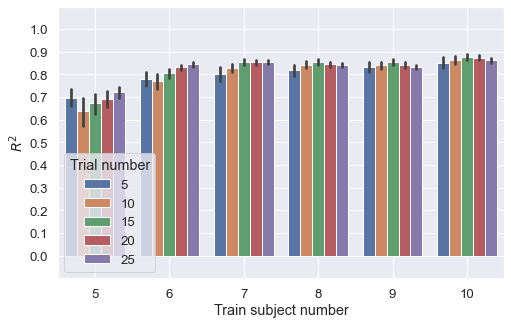

In [96]:

# display results of imu augmentation

# imu augmentation
combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","investigation_imu_augment_v1",str(trial_idx)+"trials",str(sub_idx)+"sub","testing_result_folders.txt") for sub_idx in range(5,11,1) for trial_idx in range(5,26,5)
                                    ]


#metrics = get_list_investigation_metrics(combination_investigation_results)
combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]
#metrics = get_list_investigation_metrics(combination_investigation_metrics)

#subs = list(set(metrics['alias_name']))
#replace_values = {sub: int(sub.split('v')[1])-1 for sub in subs}
replace_values = {}
replace_values.update({'baseline': 'Baseline', 'finetuning': 'Fine-tuning', 'imu_augment': 'IMU augmentation', 'Normal_DANN': 'DANN', 'DANN': 'TDANN', 'Aug_DANN': 'ADANN'})
print(replace_values)
replace_columns = {'subject_num': 'Train subject number', 'trial_num': 'Trial number'}

plot_config={
        "save_fig": False, "save_format":"jpg", "save_folder_index": 0,
         'figsize':(8, 5),
         "hue": 'Trial number',
        'replace_values': replace_values,
        'replace_columns': replace_columns,
        'x': 'Train subject number',
        'title': 'baseline',
        'yticks': (0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0),
        #'plot_title': 'baseline',
    'font_scale': 1.2,
    'plot_type': 'barplot',
    }

filters={'drop_value':0.0,'sort_variable':'r2'}
p6plot_model_accuracy(combination_investigation_metrics, ttest=False, **plot_config)

In [104]:

# imu augmentation
combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","investigation_imu_augment_v1",str(trial_idx)+"trials",str(sub_idx)+"sub","testing_result_folders.txt") for sub_idx in range(5,11,1) for trial_idx in range(5,26,5)
                                    ]
combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]
filters={'drop_value':0.0,'sort_variable':'r2'}
filters={}

aug_metrics = parase_list_investigation_metrics(combination_investigation_metrics,**filters)
aug_metrics.shape

/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/5trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/10trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/15trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/20trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/25trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/5trials/6sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/10trials/6sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/15trials/6sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/20trials/6s

(11886, 17)

Text(0.5, 10.5, 'Trial number')

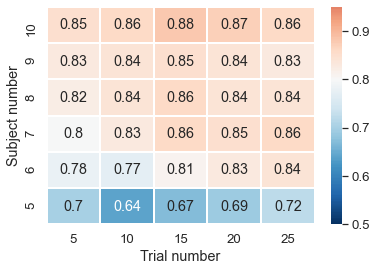

In [105]:
# imu augmentation
combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","investigation_imu_augment_v1",str(trial_idx)+"trials",str(sub_idx)+"sub","testing_result_folders.txt") for sub_idx in range(5,11,1) for trial_idx in range(5,26,5)
                                    ]
combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]
filters={'drop_value':0.0,'sort_variable':'r2'}
filters={}

aug_metrics = parase_list_investigation_metrics(combination_investigation_metrics,**filters)
aug_metrics.shape
data = aug_metrics[['trial_num','subject_num','r2']].groupby(['subject_num','trial_num']).mean().round(2).reset_index().pivot('subject_num','trial_num')['r2']
ax = sns.heatmap(data, vmin=0.5, vmax=0.95,cmap="RdBu_r",center=0.8,annot=True,linewidths=0.3).invert_yaxis()
plt.ylabel('Subject number')
plt.xlabel('Trial number')

{'baseline': 'Baseline', 'finetuning': 'Fine-tuning', 'imu_augment': 'IMU augmentation', 'Normal_DANN': 'DANN', 'DANN': 'TDANN', 'Aug_DANN': 'ADANN'}
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/5trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/5trials/6sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/5trials/7sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/5trials/8sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/5trials/9sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_baseline_v1/5trials/10sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment_v1/5trials/5sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_imu_augment

0

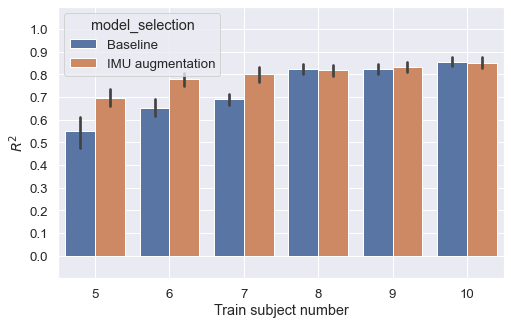

In [116]:
# compare baseline and imu augmentation
combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","investigation_baseline_v1",str(trial_idx)+"trials",str(sub_idx)+"sub","testing_result_folders.txt") for sub_idx in range(5,11,1) for trial_idx in range(5,6,5)
                                    ]+ [
    os.path.join(RESULTS_PATH, "training_testing","investigation_imu_augment_v1",str(trial_idx)+"trials",str(sub_idx)+"sub","testing_result_folders.txt") for sub_idx in range(5,11,1) for trial_idx in range(5,6,5)
                                    ]

#metrics = get_list_investigation_metrics(combination_investigation_results)
combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]

#subs = list(set(metrics['alias_name']))
#replace_values = {sub: int(sub.split('v')[1])-1 for sub in subs}
replace_values = {}
replace_values.update({'baseline': 'Baseline', 'finetuning': 'Fine-tuning', 'imu_augment': 'IMU augmentation', 'Normal_DANN': 'DANN', 'DANN': 'TDANN', 'Aug_DANN': 'ADANN'})
print(replace_values)
replace_columns = {'subject_num': 'Train subject number', 'trial_num': 'Trial number'}

plot_config={
        "save_fig": False, "save_format":"jpg", "save_folder_index": 0,
         'figsize':(8, 5),
         "hue": 'model_selection',
        'replace_values': replace_values,
        'replace_columns': replace_columns,
        'x': 'Train subject number',
        'title': 'baseline',
        'yticks': (0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0),
        #'plot_title': 'baseline',
    'font_scale': 1.2,
    'plot_type': 'barplot',
    }

filters={'drop_value':0.0,'sort_variable':'r2'}
p6plot_model_accuracy(combination_investigation_metrics, ttest=False, **plot_config)




In [108]:
aug_metrics.head()

,Unnamed: 0,model_selection,alias_name,subject_num,trial_num,labels_name,r2,r_rmse,test_subject,parent_test_id,child_test_id,Test ID,Metrics ID,subjects,trials,execution_time,additional_imus
0,0,imu_augment,5sub_5trials_baseline_v5,5,5,R_KNEE_MOMENT_X,0.103,0.245,P_21_wujianing,test_230455,test_16,test_230455,test_230455_16,P_15_liuzhaoyu,0,-100,NaN
1,1,imu_augment,5sub_5trials_baseline_v5,5,5,R_KNEE_MOMENT_X,0.821,0.128,P_20_xuanweicheng,test_230455,test_14,test_230455,test_230455_14,P_15_liuzhaoyu,0,-100,NaN
2,2,imu_augment,5sub_5trials_baseline_v5,5,5,R_KNEE_MOMENT_X,0.827,0.108,P_15_liuzhaoyu,test_230455,test_2,test_230455,test_230455_2,P_15_liuzhaoyu,0,-100,NaN
3,3,imu_augment,5sub_5trials_baseline_v5,5,5,R_KNEE_MOMENT_X,0.413,0.189,P_15_liuzhaoyu,test_230455,test_4,test_230455,test_230455_4,P_15_liuzhaoyu,0,-100,NaN
4,4,imu_augment,5sub_5trials_baseline_v5,5,5,R_KNEE_MOMENT_X,0.772,0.142,P_15_liuzhaoyu,test_230455,test_1,test_230455,test_230455_1,P_15_liuzhaoyu,0,-100,NaN


{'baseline': 'Baseline', 'finetuning': 'Fine-tuning', 'imu_augment': 'IMU augmentation', 'Normal_DANN': 'DANN', 'DANN': 'TDANN', 'Aug_DANN': 'ADANN'}
/home/sun/drop_landing_workspace/results/training_testing/investigation_intersub_normal_dann_v1/08sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_intersub_normal_dann_v1/10sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_intersub_normal_dann_v1/11sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_intersub_normal_dann_v1/14sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_intersub_normal_dann_v1/15sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_intersub_normal_dann_v1/16sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_testing/investigation_intersub_normal_dann_v1/17sub/metrics.csv
/home/sun/drop_landing_workspace/results/training_te

0

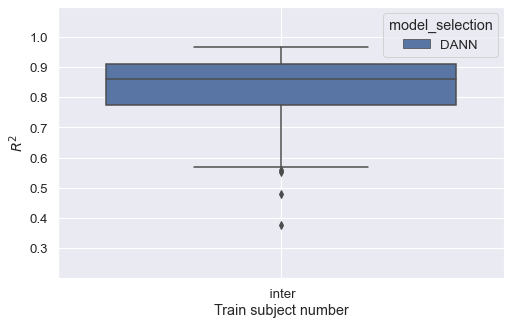

In [125]:

# compare baseline and imu augmentation
combination_investigation_results = [
    os.path.join(RESULTS_PATH, "training_testing","investigation_intersub_normal_dann_v1",sub_idx+"sub","testing_result_folders.txt") for sub_idx in ['08', '10', '11', '14','15', '16', '17', '18', '19', '20', '21', '22', '23' ]
                                    ]

#metrics = get_list_investigation_metrics(combination_investigation_results)
combination_investigation_metrics = [os.path.join(os.path.dirname(folder),"metrics.csv") for folder in combination_investigation_results]

#subs = list(set(metrics['alias_name']))
#replace_values = {sub: int(sub.split('v')[1])-1 for sub in subs}
replace_values = {}
replace_values.update({'baseline': 'Baseline', 'finetuning': 'Fine-tuning', 'imu_augment': 'IMU augmentation', 'Normal_DANN': 'DANN', 'DANN': 'TDANN', 'Aug_DANN': 'ADANN'})
print(replace_values)
replace_columns = {'subject_num': 'Train subject number', 'trial_num': 'Trial number'}

plot_config={
        "save_fig": False, "save_format":"jpg", "save_folder_index": 0,
         'figsize':(8, 5),
         "hue": 'model_selection',
        'replace_values': replace_values,
        'replace_columns': replace_columns,
        'x': 'Train subject number',
        'title': 'baseline',
        'yticks': (0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0),
        #'plot_title': 'baseline',
    'font_scale': 1.2,
    'plot_type': 'boxplot',
    }

filters={'drop_value':0.0,'sort_variable':'r2'}
filters={}
p6plot_model_accuracy(combination_investigation_metrics, ttest=False, **plot_config)

In [126]:
metrics.head()

,model_selection,alias_name,subject_num,trial_num,labels_name,r2,r_rmse,test_subject,parent_test_id,child_test_id,Test ID,Metrics ID,subjects,trials,execution_time,additional_imus
0,Normal_DANN,intersub_dann_08sub_normal_dann_v,inter,dann_08sub_normal_dann_v,R_KNEE_MOMENT_X,0.866,0.091,P_08_zhangboyuan,test_110657,test_2,test_110657,test_110657_2,P_08_zhangboyuan,0,-100,None
1,Normal_DANN,intersub_dann_08sub_normal_dann_v,inter,dann_08sub_normal_dann_v,R_KNEE_MOMENT_X,0.87,0.092,P_08_zhangboyuan,test_110657,test_4,test_110657,test_110657_4,P_08_zhangboyuan,0,-100,None
2,Normal_DANN,intersub_dann_08sub_normal_dann_v,inter,dann_08sub_normal_dann_v,R_KNEE_MOMENT_X,0.892,0.086,P_08_zhangboyuan,test_110657,test_1,test_110657,test_110657_1,P_08_zhangboyuan,0,-100,None
3,Normal_DANN,intersub_dann_08sub_normal_dann_v,inter,dann_08sub_normal_dann_v,R_KNEE_MOMENT_X,0.823,0.117,P_08_zhangboyuan,test_110657,test_6,test_110657,test_110657_6,P_08_zhangboyuan,0,-100,None
4,Normal_DANN,intersub_dann_08sub_normal_dann_v,inter,dann_08sub_normal_dann_v,R_KNEE_MOMENT_X,0.836,0.096,P_08_zhangboyuan,test_110657,test_7,test_110657,test_110657_7,P_08_zhangboyuan,0,-100,None
